# Data Cleaning Steps:

**Data Cleaning Steps:**

1. **Handling Missing Values**: Filling in, interpolating, or removing missing data points to ensure completeness.
   
2. **Correcting Errors**: Identifying and fixing typographical errors, incorrect values, or inconsistencies within the dataset.

3. **Removing Duplicates**: Identifying and eliminating duplicate records to avoid redundancy and ensure data accuracy.

4. **Standardizing Formats**: Ensuring consistent formats for dates, numbers, and categorical values. For example, converting all date entries to a standard format (e.g., YYYY-MM-DD).

5. **Filtering Outliers**: Identifying and addressing outliers that may indicate errors or exceptional cases that need special handling.

6. **Normalizing Data**: Transforming data into a common scale or format, which might involve scaling numerical values or converting text to a uniform case.

7. **Validating Data**: Ensuring that data adheres to defined rules or constraints, such as checking if email addresses are in the correct format.

8. **Resolving Inconsistencies**: Addressing discrepancies in data entries, such as variations in naming conventions or conflicting information across records.

9. **Consolidating Data**: Merging data from different sources or combining related fields to create a more coherent dataset.

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import string
import os

import warnings
warnings.filterwarnings('ignore')

# Data Reading

In [3]:
DATA_DIR = "Dataset/"
df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
TARGET_COL = ["Survived"]
ID_COL = ["PassengerId"]
TEXT_FEATURES = ["Name"]
CAT_FEATURES = [col for col in df.columns if df[col].dtype == "O" if col not in TARGET_COL+ID_COL+TEXT_FEATURES]
NUM_FEATURES = [col for col in df.columns if df[col].dtype != "O" if col not in TARGET_COL+ID_COL+TEXT_FEATURES]

In [10]:
print("id column: ", ID_COL)
print("target column: ", TARGET_COL)
print("categorical columns: ", CAT_FEATURES)
print("numerical columns: ", NUM_FEATURES)
print("text features: ", TEXT_FEATURES)

id column:  ['PassengerId']
target column:  ['Survived']
categorical columns:  ['Sex', 'Ticket', 'Cabin', 'Embarked']
numerical columns:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
text features:  ['Name']


# Correcting feature categarization : Manually

In [11]:
TARGET_COL = ["Survived"]
ID_COL = ["PassengerId"]
TEXT_FEATURES = ["Name"]
CAT_FEATURES = ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']
NUM_FEATURES = ['Age', 'SibSp', 'Parch', 'Fare']

# Cleaning Version: 1

## Text Feature Cleaning and Processing

In [1]:
TEXT_DF = df[TEXT_FEATURES].copy()

NameError: name 'df' is not defined

In [13]:
TEXT_DF.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [14]:
# lower the text/ text normalization
TEXT_DF["Name_Lower"] = TEXT_DF["Name"].apply(lambda x: x.lower())

In [15]:
TEXT_DF.head()

,Name,Name_Lower
0,"Braund, Mr. Owen Harris","braund, mr. owen harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th..."
2,"Heikkinen, Miss. Laina","heikkinen, miss. laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)"
4,"Allen, Mr. William Henry","allen, mr. william henry"


In [16]:
TEXT_DF.tail()

,Name,Name_Lower
886,"Montvila, Rev. Juozas","montvila, rev. juozas"
887,"Graham, Miss. Margaret Edith","graham, miss. margaret edith"
888,"Johnston, Miss. Catherine Helen ""Carrie""","johnston, miss. catherine helen ""carrie"""
889,"Behr, Mr. Karl Howell","behr, mr. karl howell"
890,"Dooley, Mr. Patrick","dooley, mr. patrick"


- we kept text tokenized for further analysis
- Text cleaning and processing exnds here

## Categorical Feature Cleaning and Processing

In [17]:
CAT_FEATURES

['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

In [18]:
CAT_DF = df[CAT_FEATURES].copy()

In [19]:
CAT_DF.head()

,Sex,Ticket,Cabin,Embarked,Pclass
0,male,A/5 21171,NaN,S,3
1,female,PC 17599,C85,C,1
2,female,STON/O2. 3101282,NaN,S,3
3,female,113803,C123,S,1
4,male,373450,NaN,S,3


In [20]:
CAT_DF.shape

(891, 5)

- **Pclass** is already processed we can use rest columns for further processing 

In [21]:
CAT_FEATURES = [cat_col for cat_col in CAT_FEATURES if not cat_col == "Pclass"]

In [22]:
CAT_FEATURES

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
CAT_DF = df[CAT_FEATURES].copy()

### Unique categories

In [24]:
CAT_DF.describe().T

,count,unique,top,freq
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [25]:
CAT_DF.head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


### Missing values

In [93]:
CAT_DF.isna().sum()

Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [94]:
CAT_DF.isna().sum()/ df.shape[0]

Sex         0.000000
Ticket      0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

#### Embraked

<p align="center"><img src="Dataset\map-course-of-the-Titanic-voyage-route-wreck-site-location.png" alt="Route Totanic Ship" width="1000" height="500"></p>


- `Embarked` -> missing values -> mode

In [95]:
# embarked mode
mode = CAT_DF["Embarked"].mode()

In [96]:
mode[0]

'S'

In [98]:
# missing value imputed with mode
CAT_DF["Embarked_imputed_mode"] = CAT_DF["Embarked"].fillna(value=mode[0], axis=0)

In [99]:
CAT_DF.isna().sum()

Sex                        0
Ticket                     0
Cabin                    687
Embarked                   2
Embarked_imputed_mode      0
dtype: int64

#### Cabin

In [100]:
# Cabin
CAT_DF.shape

(891, 5)

In [101]:
# not missing = all - missing
print("Data(non-missing) points in cabin :", CAT_DF.shape[0] - CAT_DF["Cabin"].isna().sum())

Data(non-missing) points in cabin : 204


In [102]:
# patterns = not missing - unique
print("Patterns in cabin :", 204 - CAT_DF["Cabin"].nunique())

Patterns in cabin : 57


#### How those patterns look like

In [103]:
Counter(CAT_DF["Cabin"].dropna().to_list())

Counter({'C85': 1,
         'C123': 2,
         'E46': 1,
         'G6': 4,
         'C103': 1,
         'D56': 1,
         'A6': 1,
         'C23 C25 C27': 4,
         'B78': 1,
         'D33': 2,
         'B30': 1,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F33': 3,
         'F G73': 2,
         'E31': 1,
         'A5': 1,
         'D10 D12': 1,
         'D26': 2,
         'C110': 1,
         'B58 B60': 2,
         'E101': 3,
         'F E69': 1,
         'D47': 1,
         'B86': 1,
         'F2': 3,
         'C2': 2,
         'E33': 2,
         'B19': 1,
         'A7': 1,
         'C49': 1,
         'F4': 2,
         'A32': 1,
         'B4': 1,
         'B80': 1,
         'A31': 1,
         'D36': 2,
         'D15': 1,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'C87': 1,
         'B77': 2,
         'E67': 2,
         'B94': 1,
         'C125': 2,
         'C99': 1,
         'C118': 1,
         'D7': 1,
         'A19': 1,
         'B49'

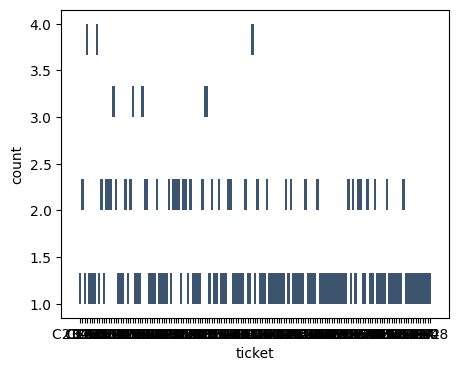

In [104]:
plt.figure(figsize=(5,4))
cabin_data = Counter(CAT_DF["Cabin"].dropna().to_list())
cabin_data = pd.DataFrame({"ticket": cabin_data.keys(),
                           "count": cabin_data.values()})
sns.histplot(data = cabin_data, x="ticket", y="count")
plt.show()

- `Cabin` -> missing values -> 'Missing' 

In [105]:
# missing value imputed with mode
CAT_DF["Cabin_imputed"] = CAT_DF["Cabin"].fillna("Missing", axis=0)

In [107]:
# merging processed data
CAT_DF = pd.concat([df[["Pclass"]], CAT_DF], axis=1)

In [108]:
CAT_DF.isna().sum()

Pclass                     0
Sex                        0
Ticket                     0
Cabin                    687
Embarked                   2
Embarked_imputed_mode      0
Cabin_imputed              0
dtype: int64

## Numerical Feature Cleaning and Processing

In [111]:
NUM_FEATURES

['Age', 'SibSp', 'Parch', 'Fare']

In [118]:
NUM_DF = df[NUM_FEATURES].copy()

In [119]:
NUM_DF.shape

(891, 4)

In [120]:
NUM_DF.isna().sum()

Age      177
SibSp      0
Parch      0
Fare       0
dtype: int64

In [121]:
NUM_DF.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


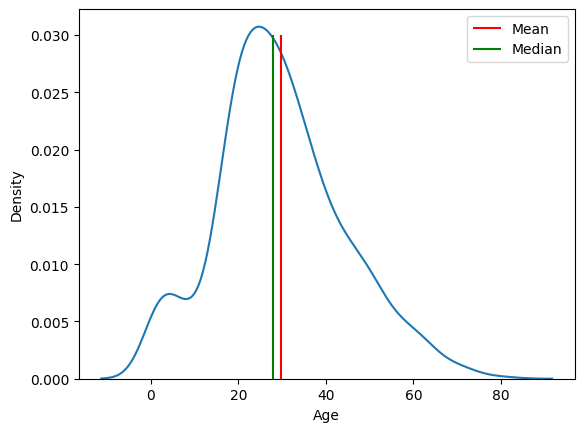

In [122]:
sns.kdeplot(data=NUM_DF, x="Age")
plt.vlines(ymin=0,ymax=0.03, x=NUM_DF.Age.mean(), label="Mean", colors="red")
plt.vlines(ymin=0,ymax=0.03, x=NUM_DF.Age.median(), label="Median", colors="green")
plt.legend()
plt.show()

- there are outliers in data
- will impute with median

In [123]:
# missing value imputed with median
median = NUM_DF["Age"].median()
NUM_DF["Age_imputed_median"] = NUM_DF["Age"].fillna(value=median, axis=0)

In [124]:
NUM_DF.isna().sum()

Age                   177
SibSp                   0
Parch                   0
Fare                    0
Age_imputed_median      0
dtype: int64

In [137]:
clean_df = pd.concat([df[ID_COL+TARGET_COL], NUM_DF, CAT_DF, TEXT_DF], axis=1)

In [138]:
clean_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_imputed_median,Pclass,Sex,Ticket,Cabin,Embarked,Embarked_imputed_mode,Cabin_imputed,Name,Name_Lower
0,1,0,22.0,1,0,7.2500,22.0,3,male,A/5 21171,NaN,S,S,Missing,"Braund, Mr. Owen Harris","braund, mr. owen harris"
1,2,1,38.0,1,0,71.2833,38.0,1,female,PC 17599,C85,C,C,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th..."
2,3,1,26.0,0,0,7.9250,26.0,3,female,STON/O2. 3101282,NaN,S,S,Missing,"Heikkinen, Miss. Laina","heikkinen, miss. laina"
3,4,1,35.0,1,0,53.1000,35.0,1,female,113803,C123,S,S,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)"
4,5,0,35.0,0,0,8.0500,35.0,3,male,373450,NaN,S,S,Missing,"Allen, Mr. William Henry","allen, mr. william henry"


In [139]:
clean_df.isna().sum()

PassengerId                0
Survived                   0
Age                      177
SibSp                      0
Parch                      0
Fare                       0
Age_imputed_median         0
Pclass                     0
Sex                        0
Ticket                     0
Cabin                    687
Embarked                   2
Embarked_imputed_mode      0
Cabin_imputed              0
Name                       0
Name_Lower                 0
dtype: int64

In [140]:
clean_df.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Age_imputed_median', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked',
       'Embarked_imputed_mode', 'Cabin_imputed', 'Name', 'Name_Lower'],
      dtype='object')

In [141]:
CLEAN_FEATURES = ['PassengerId', 'Survived', 'SibSp', 'Parch', 'Fare',
       'Age_imputed_median', 'Pclass', 'Sex', 'Ticket', 'Embarked_imputed_mode', 
       'Cabin_imputed', 'Name_Lower']

In [142]:
clean_df[CLEAN_FEATURES].isna().sum()

PassengerId              0
Survived                 0
SibSp                    0
Parch                    0
Fare                     0
Age_imputed_median       0
Pclass                   0
Sex                      0
Ticket                   0
Embarked_imputed_mode    0
Cabin_imputed            0
Name_Lower               0
dtype: int64

In [143]:
clean_df.to_csv(os.path.join(os.path.join(DATA_DIR,"clean_data"), "clean_train.csv"), index=False)

## Validating Data: Cleaned Version 1

In [144]:
val_df = pd.read_csv(os.path.join(os.path.join(DATA_DIR,"clean_data"), "clean_train.csv"))

In [145]:
val_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_imputed_median,Pclass,Sex,Ticket,Cabin,Embarked,Embarked_imputed_mode,Cabin_imputed,Name,Name_Lower
0,1,0,22.0,1,0,7.2500,22.0,3,male,A/5 21171,NaN,S,S,Missing,"Braund, Mr. Owen Harris","braund, mr. owen harris"
1,2,1,38.0,1,0,71.2833,38.0,1,female,PC 17599,C85,C,C,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th..."
2,3,1,26.0,0,0,7.9250,26.0,3,female,STON/O2. 3101282,NaN,S,S,Missing,"Heikkinen, Miss. Laina","heikkinen, miss. laina"
3,4,1,35.0,1,0,53.1000,35.0,1,female,113803,C123,S,S,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)"
4,5,0,35.0,0,0,8.0500,35.0,3,male,373450,NaN,S,S,Missing,"Allen, Mr. William Henry","allen, mr. william henry"


In [147]:
val_df.shape

(891, 16)

In [148]:
val_df.isna().sum()

PassengerId                0
Survived                   0
Age                      177
SibSp                      0
Parch                      0
Fare                       0
Age_imputed_median         0
Pclass                     0
Sex                        0
Ticket                     0
Cabin                    687
Embarked                   2
Embarked_imputed_mode      0
Cabin_imputed              0
Name                       0
Name_Lower                 0
dtype: int64

# Cleaning Version: 2